# Data Preprocessing

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
%matplotlib inline

In [3]:
# os.chdir('C:/Users/basja/Desktop/Hackathon')
dataset = pd.read_csv('final_2.csv',low_memory=False)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530602 entries, 0 to 530601
Data columns (total 71 columns):
dateSubmitted      0 non-null float64
applicationsKey    524659 non-null object
countryCode        530602 non-null int64
status             530602 non-null int64
dateFiled          524651 non-null object
dateIssued         330558 non-null object
dateDead           309996 non-null object
agreementsKey      499930 non-null object
type               530602 non-null int64
dateExecuted       499906 non-null object
claimText          451187 non-null object
independent        451192 non-null float64
fundingAmount      297835 non-null float64
person_1           529846 non-null object
person_2           417906 non-null object
person_3           234328 non-null object
person_4           130283 non-null object
person_5           88926 non-null object
person_6           37918 non-null object
person_7           17386 non-null object
person_8           4823 non-null object
person_9         

In [4]:
#All column names in the dataset
print(list(dataset))

#setup dependent variables and independent variables for patentSuccessRating
namesXpatent = ['fundingAmount', 'independent']#, 'dept_1']
namesypatent = ['status']
Xpatent = dataset[namesXpatent].values
ypatent = dataset[namesypatent].values

['dateSubmitted', 'applicationsKey', 'countryCode', 'status', 'dateFiled', 'dateIssued', 'dateDead', 'agreementsKey', 'type', 'dateExecuted', 'claimText', 'independent', 'fundingAmount', 'person_1', 'person_2', 'person_3', 'person_4', 'person_5', 'person_6', 'person_7', 'person_8', 'person_9', 'person_10', 'person_11', 'person_12', 'person_13', 'person_14', 'person_15', 'person_16', 'person_17', 'person_18', 'person_19', 'dept_1', 'dept_2', 'dept_3', 'dept_4', 'dept_5', 'dept_6', 'dept_7', 'dept_8', 'dept_9', 'dept_10', 'dept_11', 'dept_12', 'dept_13', 'dept_14', 'dept_15', 'dept_16', 'dept_17', 'dept_18', 'dept_19', 'org_1', 'org_2', 'org_3', 'org_4', 'org_5', 'org_6', 'org_7', 'org_8', 'org_9', 'org_10', 'org_11', 'org_12', 'org_13', 'org_14', 'org_15', 'org_16', 'org_17', 'org_18', 'org_19', 'r_1']


In [5]:
#setup dependent variables and independent variables for agreementSuccessRate
#namesXagreement = ['funding', 'departmentLI','departmentI2', 'departmentI3', 'companyLI', 'companyI2', 'companyI3', 'patentType']
namesXagreement = ['fundingAmount']#,'dept_1', 'org_1']
succes = dataset['agreementsKey']
namesyagreement = ['type']
Xagreement = dataset[namesXagreement].values
yagreement = dataset[namesyagreement].values

In [6]:
#setup dependent variables and independent variables for revenue
#namesXreturn = ['patentType', 'agreementType', 'funding', 'companyLI', 'companyI2', 'companyI3', 'depLI', 'depI2', 'depI3']

namesXreturn = ['type', 'fundingAmount']#, 'dept_1', 'org_1']
namesyreturn = ['r_1']
Xreturn = dataset[namesXreturn].values
yreturn = dataset[namesyreturn].values

Xreturn

array([[5.000000e+00, 3.525947e+06],
       [1.100000e+01, 3.525947e+06],
       [1.100000e+01, 3.525947e+06],
       ...,
       [1.000000e+01,          nan],
       [5.000000e+00, 0.000000e+00],
       [1.000000e+01,          nan]])

In [7]:
#Dealing with missing values
#-can remove the observation
#-can use the mean
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)# axis: use column mean or use row mean

imputerpatent = imputer.fit(Xpatent[:,0:Xpatent.shape[1]])# here should choose only the column with missing value, otherwise will have errors
Xpatent[:,0:Xpatent.shape[1]] = imputer.transform(Xpatent[:,0:Xpatent.shape[1]])
Xpatent

imputeragreement = imputer.fit(Xagreement[:,0:Xagreement.shape[1]])
Xagreement[:,0:Xagreement.shape[1]] = imputer.transform(Xagreement[:,0:Xagreement.shape[1]])
Xagreement

imputerreturn = imputer.fit(Xreturn[:,0:Xreturn.shape[1]])# here should choose only the column with missing value, otherwise will have errors
Xreturn[:,0:Xreturn.shape[1]] = imputer.transform(Xreturn[:,0:Xreturn.shape[1]])
Xreturn

array([[5.00000000e+00, 3.52594700e+06],
       [1.10000000e+01, 3.52594700e+06],
       [1.10000000e+01, 3.52594700e+06],
       ...,
       [1.00000000e+01, 5.44116635e+06],
       [5.00000000e+00, 0.00000000e+00],
       [1.00000000e+01, 5.44116635e+06]])

In [8]:
# Deal with Categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X=LabelEncoder()

for i in range(2,Xpatent.shape[1]):
    Xpatent[:,i]=labelencoder_X.fit_transform(Xpatent[:,i])
    #up to this step, we assign 0,1,2 with order, which need to be eliminated. Thus we need to make it into dummy variables
    # Creating dummy variables
    onehotencoder=OneHotEncoder(categorical_features=[i])
    Xpatent=onehotencoder.fit_transform(Xpatent).toarray()

    labelencoder_y=LabelEncoder()
    ypatent=labelencoder_y.fit_transform(ypatent)


for i in range(1, Xagreement.shape[1]):
    Xagreement[:,i]=labelencoder_X.fit_transform(Xagreement[:,i])#up to this step, we assign 0,1,2 with order, which need to be eliminated. Thus we need to make it into dummy variables
    # Creating dummy variables
    onehotencoder=OneHotEncoder(categorical_features=[i])
    Xagreement=onehotencoder.fit_transform(Xagreement).toarray()

    yagreement=labelencoder_y.fit_transform(yagreement)

    
for i in range(2, Xreturn.shape[1]):
    Xreturn[:,i]=labelencoder_X.fit_transform(Xreturn[:,i])#up to this step, we assign 0,1,2 with order, which need to be eliminated. Thus we need to make it into dummy variables
    # Creating dummy variables
    onehotencoder=OneHotEncoder(categorical_features=[i])
    Xreturn=onehotencoder.fit_transform(Xreturn).toarray()

    yreturn=labelencoder_y.fit_transform(yreturn)

In [9]:
# Splitting the Dataset into Training set and the Test set
from sklearn.cross_validation import train_test_split
Xpatent_train, Xpatent_test, ypatent_train, ypatent_test=train_test_split(Xpatent,ypatent,test_size=0.5,random_state=0)
Xagreement_train, Xagreement_test, yagreement_train, yagreement_test=train_test_split(Xagreement,yagreement,test_size=0.5,random_state=0)
Xreturn_train, Xreturn_test, yreturn_train, yreturn_test=train_test_split(Xreturn,yreturn,test_size=0.5,random_state=0)
#the first parameters is array, so cannot put in the whole dataset
Xpatent_train.shape

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(265301, 2)

In [10]:
#Feature Scaling

# why we should scale the data.
#(1)If the variables does not have the same range, than the distance between the two variables will be dominated by the variable with a larger range.
#(2)If we do not scale, it will run for a very long time, for instance decision trees

#starndardisation: (x-mean)/standard deviation
#normalisation: (x-min)/(max-min)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
Xpatent_train=sc_X.fit_transform(Xpatent_train)
Xpatent_test=sc_X.transform(Xpatent_test)#test only need "transform"

Xagreement_train=sc_X.fit_transform(Xagreement_train)
Xagreement_test=sc_X.transform(Xagreement_test)#test only need "transform"

Xreturn_train=sc_X.fit_transform(Xreturn_train)
Xreturn_test=sc_X.transform(Xreturn_test)#test only need "transform"

#Should dummy variables be scaled?
#(1) no: already in the same scale as other variables;
#(2) yes: scaling will not harm the predictive results.

# do not need to scale the dependent variables here since it is 0,1; for other regression model, yes

# Regression
In this part, you will understand and learn how to implement the following Machine Learning Regression models:

- Simple Linear Regression
- Multiple Linear Regression
- Polynomial Regression
- Support Vector for Regression (SVR)
- Decision Tree Classification
- Random Forest Classification

## Multiple linear regression

In [145]:
#Fitting multiple linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(Xpatent_train,ypatent_train)
#regressor.fit(Xagreement_train,yagreement_train)
#regressor.fit(Xreturn_train,yreturn_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
# Predicting the Test set results
ypatent_pred=regressor.predict(Xpatent_test)
#yagreement_pred=regressor.predict(Xagreement_test)
#yreturn_pred=regressor.predict(Xreturn_test)

In [147]:
#Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm 
# this model does not have the take x0 into consideration
# thus need to add one row that contains only 1 to create B0
# this is needed for backward elimination


#Adjust dimensions
Xpatent=np.append(arr=np.ones((Xpatent.shape[0],Xpatent.shape[1])).astype(int), values=Xpatent,axis=1)
Xagreement=np.append(arr=np.ones((Xagreement.shape[0],Xagreement.shape[1])).astype(int), values=Xagreement,axis=1)
Xreturn=np.append(arr=np.ones((Xreturn.shape[0],Xreturn.shape[1])).astype(int), values=Xreturn,axis=1)

In [148]:
#Xpatent_opt=Xpatent[:,[0,1,2,3,4,5]] #the basket created to hold the final variables
#Xagreement_opt=Xagreement[:,[0,1,2,3,4,5]] 
#Xreturn_opt=Xagreement[:,[0,1,2,3,4,5]] 

In [149]:
regressor_OLS=sm.OLS(endog=ypatent, exog=Xpatent).fit()#ordinary least square
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     600.7
Date:                Sun, 30 Sep 2018   Prob (F-statistic):               0.00
Time:                        07:15:53   Log-Likelihood:            -9.1256e+05
No. Observations:              530602   AIC:                         1.825e+06
Df Residuals:                  530588   BIC:                         1.825e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.001    116.430      0.000       0.084       0.087
x1             0.0856      0.001    116.430      0.000       0.084       0.087
x2             0.0856      0.001    116.430      0.000       0.084       0.087
x3             0.0856      0.001    116.430      0.000       0.084       0.087
x4             0.0856      0.001    116.430      0.000       0.084       0.087
x5             0.0856      0.001    116.430      0.000       0.084       0.087
x6             0.0856      0.001    116.430      0.000       0.084       0.087
x7             0.0856      0.001    116.430      0.000       0.084       0.087
x8             0.0856      0.001    116.430      0.000       0.084       0.087
x9             0.0856      0.001    116.430      0.000       0.084       0.087
x10            0.0856      0.001    116.430      0.000       0.084       0.087
x11            0.0856      0.001    116.430      0.000       0.084       0.087
x12            0.0856      0.001    116.430      0.000       0.084       0.087
x13            0.0856      0.001    116.430      0.000       0.084       0.087
x14            0.2120      0.011     19.913      0.000       0.191       0.233
x15            0.1666      0.015     11.198      0.000       0.137       0.196
x16           -0.3312      0.012    -26.720      0.000      -0.355      -0.307
x17            0.0006      0.011      0.054      0.957      -0.022       0.023
x18           -0.3392      0.016    -21.403      0.000      -0.370      -0.308
x19           -0.0589      0.011     -5.375      0.000      -0.080      -0.037
x20            0.0744      0.011      6.697      0.000       0.053       0.096
x21            0.1621      0.014     11.611      0.000       0.135       0.189
x22            0.0490      0.012      4.098      0.000       0.026       0.072
x23           -0.2217      0.014    -16.017      0.000      -0.249      -0.195
x24            0.1570      0.109      1.439      0.150      -0.057       0.371
x25            0.2149      0.018     11.761      0.000       0.179       0.251
x26         3.556e-09   1.84e-10     19.354      0.000     3.2e-09    3.92e-09
x27            0.0211      0.005      3.991      0.000       0.011       0.031
==============================================================================
Omnibus:                    12713.200   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64940.877
Skew:                           0.393   Prob(JB):                         0.00
Kurtosis:                       1.477   Cond. No.                     1.87e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-19. This might indic

In [134]:
regressor_OLS=sm.OLS(endog=yagreement, exog=Xagreement).fit()#ordinary least square
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.378e+25
Date:                Sun, 30 Sep 2018   Prob (F-statistic):               0.00
Time:                        07:14:16   Log-Likelihood:             1.1350e+07
No. Observations:              530602   AIC:                        -2.270e+07
Df Residuals:                  530588   BIC:                        -2.270e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x1             0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x2             0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x3             0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x4             0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x5             0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x6             0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x7             0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x8             0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x9             0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x10            0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x11            0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x12            0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x13            0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x14            0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x15            0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x16            0.0007   4.91e-14   1.34e+10      0.000       0.001       0.001
x17            0.0196   6.18e-13   3.16e+10      0.000       0.020       0.020
x18           -0.0189   6.22e-13  -3.04e+10      0.000      -0.019      -0.019
x19            0.0156   4.02e-13   3.89e+10      0.000       0.016       0.016
x20           -0.0150   3.97e-13  -3.77e+10      0.000      -0.015      -0.015
x21           -0.0464   1.19e-12  -3.91e+10      0.000      -0.046      -0.046
x22           -0.0227   4.84e-13  -4.68e+10      0.000      -0.023      -0.023
x23           -0.0147   1.14e-12   -1.3e+10      0.000      -0.015      -0.015
x24           -0.0068   8.06e-13  -8.47e+09      0.000      -0.007      -0.007
x25            0.0011   1.14e-12   9.44e+08      0.000       0.001       0.001
x26            0.0090   1.67e-12    5.4e+09      0.000       0.009       0.009
x27            0.0169   1.87e-12   9.04e+09      0.000       0.017       0.017
x28            0.0248   2.28e-12   1.09e+10      0.000       0.025       0.025
x29            0.0327   8.46e-12   3.87e+09      0.000       0.033       0.033
x30            0.0406   3.04e-12   1.34e+10      0.000       0.041       0.041
x31        -1.077e-17   1.69e-20   -638.496      0.000   -1.08e-17   -1.07e-17
x32            0.9921   3.65e-13   2.72e+12      0.000       0.992       0.992
x33         2.596e-13   4.84e-13      0.536      0.592    -6.9e-13    1.21e-12
==============================================================================
Omnibus:                   978801.669   Durbin-Watson:                   0.052
Pr

In [135]:
regressor_OLS=sm.OLS(endog=yreturn, exog=Xreturn).fit()#ordinary least square
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                 9.995e+04
Date:                Sun, 30 Sep 2018   Prob (F-statistic):               0.00
Time:                        07:14:18   Log-Likelihood:            -5.8766e+05
No. Observations:              530602   AIC:                         1.175e+06
Df Residuals:                  530588   BIC:                         1.176e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1300      0.000    416.253      0.000       0.129       0.131
x1             0.1300      0.000    416.253      0.000       0.129       0.131
x2             0.1300      0.000    416.253      0.000       0.129       0.131
x3             0.1300      0.000    416.253      0.000       0.129       0.131
x4             0.1300      0.000    416.253      0.000       0.129       0.131
x5             0.1300      0.000    416.253      0.000       0.129       0.131
x6             0.1300      0.000    416.253      0.000       0.129       0.131
x7             0.1300      0.000    416.253      0.000       0.129       0.131
x8             0.1300      0.000    416.253      0.000       0.129       0.131
x9             0.1300      0.000    416.253      0.000       0.129       0.131
x10            0.1300      0.000    416.253      0.000       0.129       0.131
x11            0.1300      0.000    416.253      0.000       0.129       0.131
x12            0.1300      0.000    416.253      0.000       0.129       0.131
x13            0.1300      0.000    416.253      0.000       0.129       0.131
x14            0.1300      0.000    416.253      0.000       0.129       0.131
x15            0.1300      0.000    416.253      0.000       0.129       0.131
x16            0.1300      0.000    416.253      0.000       0.129       0.131
x17            0.1300      0.000    416.253      0.000       0.129       0.131
x18           -2.1000      0.002   -897.016      0.000      -2.105      -2.095
x19            2.2300      0.002    966.032      0.000       2.225       2.235
x20            0.3990      0.002    250.806      0.000       0.396       0.402
x21           -0.2690      0.002   -163.299      0.000      -0.272      -0.266
x22           -0.6380      0.007    -96.783      0.000      -0.651      -0.625
x23           -0.5627      0.006    -88.673      0.000      -0.575      -0.550
x24            0.0086      0.007      1.253      0.210      -0.005       0.022
x25           -0.0127      0.005     -2.527      0.012      -0.022      -0.003
x26           -0.0136      0.007     -1.961      0.050      -0.027   -7.49e-06
x27           -0.7500      0.010    -75.589      0.000      -0.769      -0.731
x28           -0.4683      0.011    -42.314      0.000      -0.490      -0.447
x29           -0.7821      0.013    -58.156      0.000      -0.808      -0.756
x30            2.2020      0.050     43.965      0.000       2.104       2.300
x31           -0.8142      0.018    -45.799      0.000      -0.849      -0.779
x32            0.0080      0.001      7.664      0.000       0.006       0.010
x33         9.775e-11   9.96e-11      0.982      0.326   -9.74e-11    2.93e-10
x34            0.0080      0.001      7.664      0.000       0.006       0.010
x35           -0.0040      0.003     -1.381      0.167      -0.010       0.002
==

## Polynomial regression

In [184]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree = 4)
Xpatent_poly= poly_reg.fit_transform(Xpatent) # do not have test set and train set split
Xpatent_poly

Xagreement_poly= poly_reg.fit_transform(Xagreement) # do not have test set and train set split
Xagreement_poly

Xreturn_poly= poly_reg.fit_transform(Xreturn) # do not have test set and train set split
Xreturn_poly

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          3.10807556e+14,   2.19178194e+20,   1.54562139e+26],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.50430857e+15,   4.82192027e+20,   1.54562139e+26],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.50430857e+15,   4.82192027e+20,   1.54562139e+26],
       ..., 
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.41196943e+16,   1.67779132e+22,   1.99365768e+28],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.56529875e+14,   1.95837501e+19,   2.45016018e+24],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [190]:
lin_reg_2 = LinearRegression()

lin_reg_2_model = lin_reg_2.fit(Xpatent_poly,ypatent)
lin_reg_2_model.summary()

LinAlgError: Singular matrix

In [ ]:
lin_reg_2_model = lin_reg_2.fit(Xagreement_poly,yagreement)
lin_reg_2_model.summary()

In [ ]:
lin_reg_2_model = lin_reg_2.fit(Xreturn_poly,yreturn)
lin_reg_2_model.summary()

## SVR

In [191]:
# for SVR, should do the scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()

#Does x need to be appended?
Xpatent=sc_X.fit_transform(Xpatent)
ypatent=sc_y.fit_transform(ypatent)
Xagreement=sc_X.fit_transform(Xagreement)
yagreement=sc_y.fit_transform(yagreement)
Xreturn=sc_X.fit_transform(Xreturn)
yreturn=sc_y.fit_transform(yreturn)


C:\Users\basja\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
#Fitting SVR to the dataset
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(Xpatent,ypatent)


C:\Users\basja\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
regressor.fit(Xagreement,yagreement)

In [ ]:
regressor.fit(Xreturn, yreturn)

In [55]:
ypatent_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[Xpatent]]))))
ypatent_pred

array([170387.73289107])

In [ ]:
yagreement_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[Xagreement]]))))
yagreement_pred

In [ ]:
yreturn_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[Xreturn]]))))
yreturn_pred

## Decision Trees

In [16]:
#CART classification and regression Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressorpatent = regressor.fit(Xpatent,ypatent)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
regressoragreement = regressor.fit(Xagreement,yagreement)

In [ ]:
regressorreturn = regressor.fit(Xreturn,yreturn)

In [62]:
#Predict the rest of the data set, except training data?
ypatent_pred = regressorpatent.predict(Xpatent)
ypatent_pred

array([150000.])

In [ ]:
yagreement_pred = regressoragreement.predict(Xagreement)
yagreement_pred

In [ ]:
yreturn_pred = regressor.predict(Xreturn)
yreturn_pred

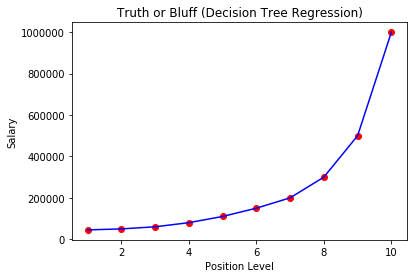

In [63]:
#Change graph. What can we plot?
plt.scatter(X,y,color='red')
plt.plot(X, regressor.predict(X), color="blue")
plt.title("Truth or Bluff (Decision Tree Regression)")
plt.xlabel("Position Level")
plt.ylabel('Salary')
plt.show()

## Ensemble Learning: Random Forest Insitution

## Random Forest regression

In [11]:
#Xpatent_train, Xpatent_test, ypatent_train, ypatent_test=train_test_split(Xpatent,ypatent,test_size=0.2,random_state=0)
#Xagreement_train, Xagreement_test, yagreement_train, yagreement_test=train_test_split(Xagreement,yagreement,test_size=0.2,random_state=0)
#Xreturn_train, Xreturn_test, yreturn_train, yreturn_test=train_test_split(Xreturn,yreturn,test_size=0.2,random_state=0)

Xpatent.shape

(530602, 2)

In [12]:
# rf.predict(test[1:, 1:])
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(Xpatent_train,ypatent_train)
predictionpatent = regressor.predict(Xpatent_test)

regressor.fit(Xagreement,yagreement)
predictionagreement = regressor.predict(Xagreement_test)

regressor.fit(Xreturn,yreturn)
predictionreturn = regressor.predict(Xreturn_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
errors = abs(predictionpatent - ypatent_test)
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), ypatent_test[1]), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / ypatent_test[1]))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
errors = abs(predictionagreement - ypatent_test)
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), ypatent_test[1]), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / ypatent_test[1]))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
errors = abs(predictionreturn - ypatent_test)
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), ypatent_test[1]), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / ypatent_test[1]))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

## Logistic regression

In [98]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.50,random_state=0)

NameError: name 'X' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
Xpatent_train=sc_X.fit_transform(Xpatent_train)
Xpatent_test=sc_X.transform(Xpatent_test)

Xagreement_train=sc_X.fit_transform(Xagreement_train)
Xagreement_test=sc_X.transform(Xagreement_test)

Xreturn_train=sc_X.fit_transform(Xreturn_train)
Xreturn_test=sc_X.transform(Xreturn_test)

In [ ]:
#fitting into the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(Xpatent_train, ypatent_train)

In [33]:
#Predicting the test set results
ypatent_pred = classifier.predict(Xpatent_test)

In [101]:
classifier.fit(Xagreement_train, yagreement_train)
yagreement_pred = classifier.predict(Xagreement_test)

In [102]:
classifier.fit(Xreturn_train, yreturn_train)
yreturn_pred = classifier.predict(Xreturn_test)

In [103]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cmpatent = confusion_matrix(ypatent_test, ypatent_pred)
cmagreement = confusion_matrix(yagreement_test, yagreement_pred)
cmreturn = confusion_matrix(yreturn_test, yreturn_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
#ADJUST!!!!!!



#Visualising the training set results
from matplotlib.colors import ListedColormap
X_set,y_set=X_test, y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

#step is the resolution of the pixcel data
#+1 -1 to make all the point in the picture
# y is represented by the color
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red','green')))

#np.array() creating the array
#ravel() for x1 to create continous number within the range of X1
#X1 and X2 will be the independent variables.
# np.array([X1.ravel(),X2.ravel()]) put the two array into one
#.T (transpose)create a array that each role is a set of [X1, X2] 
# use the pair of X1 X2 to predict y and shape y into the same form of X1
# all the prediction point ahve been drawn till this still

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
print(np.unique(y_set))
#print(X_set[y_set==j,0])
print(X_set)
print(X_set[1,0])
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Regression (Testing set)')   
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## KNN

In [67]:
#Already done?

#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25,random_state=0)
#from sklearn.preprocessing import StandardScaler
#sc_X=StandardScaler()
#X_train=sc_X.fit_transform(X_train)
#X_test=sc_X.transform(X_test)

C:\Users\xiaoran.cai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(Xpatent_train, ypatent_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
ypatent_pred=classifier.predict(Xpatent_test)

classifier.fit(Xagreement_train, yagreement_train)
yagreement_pred = classifier.predict(Xagreement_test)

classifier.fit(Xreturn_train, yreturn_train)
yreturn_pred = classifier.predict(Xreturn_test)

In [ ]:
cmpatent = confusion_matrix(ypatent_test, ypatent_pred)
cmagreement = confusion_matrix(yagreement_test, yagreement_pred)
cmreturn = confusion_matrix(yreturn_test, yreturn_pred)

[0 1]
[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590

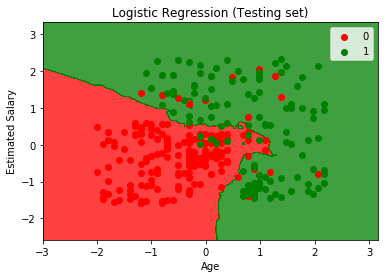

In [77]:
#Adjust!!!!!


#Visualising the training set results
from matplotlib.colors import ListedColormap
X_set,y_set=X_train, y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

#step is the resolution of the pixcel data
#+1 -1 to make all the point in the picture
# y is represented by the color
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red','green')))

#np.array() creating the array
#ravel() for x1 to create continous number within the range of X1
#X1 and X2 will be the independent variables.
# np.array([X1.ravel(),X2.ravel()]) put the two array into one
#.T (transpose)create a array that each role is a set of [X1, X2] 
# use the pair of X1 X2 to predict y and shape y into the same form of X1
# all the prediction point ahve been drawn till this still

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
print(np.unique(y_set))
#print(X_set[y_set==j,0])
print(X_set)
print(X_set[1,0])
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Regression (Testing set)')   
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


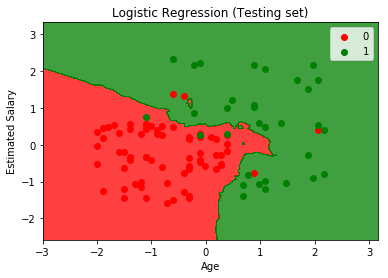

In [79]:
#Adjust!!!!!


#Visualising the training set results
from matplotlib.colors import ListedColormap
X_set,y_set=X_test, y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

#step is the resolution of the pixcel data
#+1 -1 to make all the point in the picture
# y is represented by the color
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red','green')))

#np.array() creating the array
#ravel() for x1 to create continous number within the range of X1
#X1 and X2 will be the independent variables.
# np.array([X1.ravel(),X2.ravel()]) put the two array into one
#.T (transpose)create a array that each role is a set of [X1, X2] 
# use the pair of X1 X2 to predict y and shape y into the same form of X1
# all the prediction point ahve been drawn till this still

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
#print(np.unique(y_set))
#print(X_set[y_set==j,0])
#print(X_set)
#print(X_set[1,0])
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Regression (Testing set)')   
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
